In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(1) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:
# Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import dame_flame
import random
import matplotlib.pyplot as plt

In [4]:
# LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry.csv")
LIFT_reg = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_registry_2022-03-22.csv")

In [122]:
LIFT_reg # 117728 ROWS

,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial Load,Study Card,card_id
0,36,Black or African American,Other,8/31/2019,2017-06-15,KCMCCS,5.303303e+11,NaN,NaN,568-1
1,56,White,English,7/31/2019,2017-06-05,YWCA,5.303300e+11,NaN,NaN,2690-1
2,58,White,English,11/30/2021,2019-08-28,King County Public Health,5.303300e+11,NaN,NaN,2690-2
3,49,Black or African American,English,11/30/2023,2022-01-26,DSHS - ORCA LIFT (remote enrollment),5.305306e+11,10.0,NaN,2704-1
4,46,Asian,English,5/31/2021,2019-06-30,King County Public Health,5.303301e+11,NaN,NaN,2706-1
...,...,...,...,...,...,...,...,...,...,...
117723,26,White,English,3/31/2025,2022-03-17,King County Public Health,5.303303e+11,10.0,NaN,272812-1
117724,26,Black or African American,English,3/31/2025,2022-03-17,King County Public Health,5.303300e+11,10.0,NaN,272814-1
117725,52,White,English,10/31/2024,2022-03-17,King County Public Health,5.303303e+11,NaN,Subsidized Annual Pass,272816-1
117726,58,Black or African American,English,3/31/2025,2022-03-17,King County Public Health,5.303303e+11,10.0,NaN,272818-1


In [123]:
LIFT_reg.columns = [c.replace(' ', '_') for c in LIFT_reg.columns]

In [124]:
# type(LIFT_reg.DateIssued[1])
LIFT_reg['DateIssued'] = pd.to_datetime(LIFT_reg['DateIssued'])
# LIFT_reg['Expiration'] = pd.to_datetime(LIFT_reg['Expiration'])

In [125]:
p1 = LIFT_reg[(LIFT_reg.Study_Card != "Subsidized Annual Pass") 
         & (LIFT_reg.Age >= 18) 
         & (LIFT_reg.DateIssued >= "2019-03-01")
         & (LIFT_reg.DateIssued <= "2019-07-01") # analyze sales data starting from 2020-01-01
         & (LIFT_reg.CardIssuingAgency.isin(["CSO Auburn", "CSO Capitol Hill", "CSO White Center"]))]

In [126]:
# split into user id and card number
p1[['user_id', 'stage']] = p1['card_id'].str.split('-', expand=True)

In [127]:
p1 # 1368 rows (updated 3/29: 1398 rows)

,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,card_id,user_id,stage
187,50,American Indian or Alaska Native,English,2/28/2022,2019-04-01,CSO White Center,5.303301e+11,10.0,NaN,3228-1,3228,1
425,66,White,English,5/31/2021,2019-05-29,CSO Capitol Hill,5.303301e+11,NaN,Phase1 Treatment,3970-2,3970,2
1267,50,NaN,NaN,2/28/2022,2019-04-26,CSO Capitol Hill,5.303301e+11,10.0,NaN,6476-2,6476,2
1418,64,White,English,2/28/2022,2019-04-25,CSO White Center,5.303303e+11,10.0,NaN,6950-1,6950,1
2521,57,Black or African American,English,10/31/2021,2019-05-13,CSO Capitol Hill,5.303301e+11,10.0,NaN,10168-2,10168,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80832,44,Asian,Other,2/28/2022,2019-07-01,CSO White Center,5.303303e+11,10.0,NaN,201564-1,201564,1
80835,45,White,English,6/30/2022,2019-07-01,CSO Capitol Hill,5.303301e+11,10.0,NaN,201568-1,201568,1
80838,34,White,English,6/30/2022,2019-07-01,CSO Capitol Hill,5.303301e+11,10.0,NaN,201572-1,201572,1
80845,64,White,English,2/28/2022,2019-07-01,CSO White Center,5.303303e+11,10.0,NaN,201584-1,201584,1


In [128]:
p1["Initial_Load"] = p1["Initial_Load"].replace(np.nan, "Passport")
p1["RaceDesc"] = p1["RaceDesc"].replace(np.nan, "None")
p1["Initial_Load"] = p1["Initial_Load"].replace(10.0, "10")
p1

,Age,RaceDesc,LanguageSpoken,Expiration,DateIssued,CardIssuingAgency,FIPS,Initial_Load,Study_Card,card_id,user_id,stage
187,50,American Indian or Alaska Native,English,2/28/2022,2019-04-01,CSO White Center,5.303301e+11,10,NaN,3228-1,3228,1
425,66,White,English,5/31/2021,2019-05-29,CSO Capitol Hill,5.303301e+11,Passport,Phase1 Treatment,3970-2,3970,2
1267,50,None,NaN,2/28/2022,2019-04-26,CSO Capitol Hill,5.303301e+11,10,NaN,6476-2,6476,2
1418,64,White,English,2/28/2022,2019-04-25,CSO White Center,5.303303e+11,10,NaN,6950-1,6950,1
2521,57,Black or African American,English,10/31/2021,2019-05-13,CSO Capitol Hill,5.303301e+11,10,NaN,10168-2,10168,2
...,...,...,...,...,...,...,...,...,...,...,...,...
80832,44,Asian,Other,2/28/2022,2019-07-01,CSO White Center,5.303303e+11,10,NaN,201564-1,201564,1
80835,45,White,English,6/30/2022,2019-07-01,CSO Capitol Hill,5.303301e+11,10,NaN,201568-1,201568,1
80838,34,White,English,6/30/2022,2019-07-01,CSO Capitol Hill,5.303301e+11,10,NaN,201572-1,201572,1
80845,64,White,English,2/28/2022,2019-07-01,CSO White Center,5.303303e+11,10,NaN,201584-1,201584,1


In [129]:
p1["Initial_Load"].value_counts() # 186 individuals got Passport in phase 1

10          1212
Passport     186
Name: Initial_Load, dtype: int64

In [130]:
d = {"Passport":1, "10": 0}
p1['Study_Card'] = p1['Initial_Load'].map(d)

In [131]:
# bin all continuous variables.
p1['Age_bin']=pd.cut(x = p1['Age'],
                        bins = [17,25,35,45,55,65,100], 
                        labels = [0,1,2,3,4,5])

# I use one hot encoding for features with more than one category (ie 'RaceDesc','LanguageSpoken', 'CardIssuingAgency')
prep_data = p1[['RaceDesc','LanguageSpoken', 'CardIssuingAgency']]
# prep_data
prep_data=pd.get_dummies(prep_data)
prep_data

p1.drop(columns=['RaceDesc','LanguageSpoken', 'CardIssuingAgency'],inplace=True)

In [132]:
p1 # 3/28: 1398

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,card_id,user_id,stage,Age_bin
187,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228-1,3228,1,3
425,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970-2,3970,2,5
1267,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476-2,6476,2,3
1418,64,2/28/2022,2019-04-25,5.303303e+11,10,0,6950-1,6950,1,4
2521,57,10/31/2021,2019-05-13,5.303301e+11,10,0,10168-2,10168,2,4
...,...,...,...,...,...,...,...,...,...,...
80832,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564-1,201564,1,2
80835,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568-1,201568,1,2
80838,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572-1,201572,1,1
80845,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584-1,201584,1,4


In [133]:
# join with one hot encodings for features with more than one category
p1 = p1.merge(prep_data,left_index=True, right_index=True,how='left')
p1

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,card_id,user_id,stage,Age_bin,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
187,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228-1,3228,1,3,...,0,0,0,0,0,0,0,0,0,1
425,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970-2,3970,2,5,...,0,0,0,0,0,0,0,0,1,0
1267,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476-2,6476,2,3,...,0,0,0,0,0,0,0,0,1,0
1418,64,2/28/2022,2019-04-25,5.303303e+11,10,0,6950-1,6950,1,4,...,0,0,0,0,0,0,0,0,0,1
2521,57,10/31/2021,2019-05-13,5.303301e+11,10,0,10168-2,10168,2,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80832,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564-1,201564,1,2,...,1,0,0,0,0,0,0,0,0,1
80835,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568-1,201568,1,2,...,0,0,0,0,0,0,0,0,1,0
80838,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572-1,201572,1,1,...,0,0,0,0,0,0,0,0,1,0
80845,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584-1,201584,1,4,...,0,0,0,0,0,0,0,0,0,1


In [134]:
# p1 = p1.drop('card_id', 1)
p1

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,card_id,user_id,stage,Age_bin,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
187,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228-1,3228,1,3,...,0,0,0,0,0,0,0,0,0,1
425,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970-2,3970,2,5,...,0,0,0,0,0,0,0,0,1,0
1267,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476-2,6476,2,3,...,0,0,0,0,0,0,0,0,1,0
1418,64,2/28/2022,2019-04-25,5.303303e+11,10,0,6950-1,6950,1,4,...,0,0,0,0,0,0,0,0,0,1
2521,57,10/31/2021,2019-05-13,5.303301e+11,10,0,10168-2,10168,2,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80832,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564-1,201564,1,2,...,1,0,0,0,0,0,0,0,0,1
80835,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568-1,201568,1,2,...,0,0,0,0,0,0,0,0,1,0
80838,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572-1,201572,1,1,...,0,0,0,0,0,0,0,0,1,0
80845,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584-1,201584,1,4,...,0,0,0,0,0,0,0,0,0,1


In [135]:
# we will examine sales on a user_id rather than card_id level (ie. dropping the final number in the card, "stage").
p1_nostage = p1.loc[:, ~p1.columns.isin(['stage','card_id'])]

In [136]:
p1_nostage.drop_duplicates() # no duplicates user_id, stage 1, stage 2 
# (which makes sense because they would not have registered 2x within this period.)

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
187,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,0,0,0,0,0,1
425,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,0,0,0,0,0,1,0
1267,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,0,0,0,0,1,0
1418,64,2/28/2022,2019-04-25,5.303303e+11,10,0,6950,4,0,0,...,0,0,0,0,0,0,0,0,0,1
2521,57,10/31/2021,2019-05-13,5.303301e+11,10,0,10168,4,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80832,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564,2,0,1,...,1,0,0,0,0,0,0,0,0,1
80835,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568,2,0,0,...,0,0,0,0,0,0,0,0,1,0
80838,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572,1,0,0,...,0,0,0,0,0,0,0,0,1,0
80845,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584,4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
print(p1.columns)
p1.describe() # 13% of individuals got treatment

Index(['Age', 'Expiration', 'DateIssued', 'FIPS', 'Initial_Load', 'Study_Card',
       'card_id', 'user_id', 'stage', 'Age_bin',
       'RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic or Latino',
       'RaceDesc_Multi-Racial',
       'RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None',
       'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White',
       'LanguageSpoken_Chinese', 'LanguageSpoken_Dari',
       'LanguageSpoken_English', 'LanguageSpoken_Korean',
       'LanguageSpoken_Not Specified', 'LanguageSpoken_Oromo',
       'LanguageSpoken_Other', 'LanguageSpoken_Russian',
       'LanguageSpoken_Somali', 'LanguageSpoken_Spanish',
       'LanguageSpoken_Tagalog', 'LanguageSpoken_Tigrinya',
       'LanguageSpoken_Vietnamese', 'CardIssuingAgency_CSO Auburn',
       'CardIssuingAgency_CSO Capitol Hill',
       'CardIssuingAgency_CSO White Center'],
      dtype='object')


,Age,FIPS,Study_Card,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
count,1398.000000,1.328000e+03,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,...,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.000000,1398.00000,1398.000000,1398.000000
mean,39.890558,5.303397e+11,0.133047,0.009299,0.046495,0.329041,0.071531,0.022175,0.024320,0.022890,...,0.031474,0.001431,0.002146,0.033619,0.002861,0.005007,0.001431,0.13877,0.298283,0.562947
std,13.496527,4.586653e+07,0.339747,0.096016,0.210630,0.470033,0.257802,0.147304,0.154097,0.149606,...,0.174656,0.037810,0.046291,0.180312,0.053433,0.070609,0.037810,0.34583,0.457668,0.496199
min,18.000000,5.303300e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,29.000000,5.303301e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,38.000000,5.303303e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,50.000000,5.303303e+11,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,97.000000,5.306105e+11,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [142]:
# Combine the Response-variable (sales) with the features (registry).
LIFT_s = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales.csv")
LIFT_s_cont = pd.read_csv("/Users/JennyH/cisil-causal-inference/Data/LIFT_sales_2021-11-01_to_2022-03-06.csv")

In [143]:
LIFT_s # 585230 rows (ends: 2021-10-31)

,week,Txn Desc,loadings,Amount,card_id
0,2017-03-12,Purse,2,20.0,94262-1
1,2017-04-02,Purse,1,25.0,94262-1
2,2017-08-20,Purse,1,10.0,94262-1
3,2017-11-19,Pass,1,8.0,94262-1
4,2018-01-07,Pass,1,8.0,94262-1
...,...,...,...,...,...
585225,2021-06-20,Purse,1,170.0,137082-2
585226,2021-04-04,Pass,1,54.0,249966-1
585227,2021-04-04,Pass,1,54.0,249968-1
585228,2021-05-09,Pass,1,54.0,251502-1


In [144]:
LIFT_s_cont # 27725 rows (dates: 11/1/2021 - 3/06/2022)

,week,Txn Desc,loadings,Amount,card_id
0,2021-12-12,Purse,1,5.0,18898-1
1,2021-12-19,Purse,1,7.0,18898-1
2,2021-11-14,Purse,1,20.0,97444-1
3,2021-11-21,Purse,1,20.0,97444-1
4,2021-12-05,Purse,1,20.0,97444-1
...,...,...,...,...,...
27720,2022-02-06,Pass,2,756.0,272590-1
27721,2022-02-06,Pass,2,756.0,272552-1
27722,2022-02-06,Pass,2,756.0,272596-1
27723,2022-02-27,Pass,1,54.0,110102-2


In [145]:
LIFT_s = LIFT_s.append(LIFT_s_cont, ignore_index=True) # 612955 rows

In [146]:
LIFT_s_afterp1 = LIFT_s[(LIFT_s.week >= "2020-01-01")]
LIFT_s_afterp1 # 159339 rows

,week,Txn Desc,loadings,Amount,card_id
312,2020-01-26,Purse,1,20.0,116384-1
314,2020-01-26,Purse,1,20.0,116366-1
543,2020-01-19,Purse,1,18.0,96384-1
872,2020-11-29,Purse,1,10.0,130826-1
902,2020-01-26,Purse,1,20.0,122564-2
...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590-1
612951,2022-02-06,Pass,2,756.0,272552-1
612952,2022-02-06,Pass,2,756.0,272596-1
612953,2022-02-27,Pass,1,54.0,110102-2


In [147]:
# split into user id and card number
LIFT_s_afterp1[['user_id', 'stage']] = LIFT_s_afterp1['card_id'].str.split('-', expand=True)

In [148]:
LIFT_s_afterp1

,week,Txn Desc,loadings,Amount,card_id,user_id,stage
312,2020-01-26,Purse,1,20.0,116384-1,116384,1
314,2020-01-26,Purse,1,20.0,116366-1,116366,1
543,2020-01-19,Purse,1,18.0,96384-1,96384,1
872,2020-11-29,Purse,1,10.0,130826-1,130826,1
902,2020-01-26,Purse,1,20.0,122564-2,122564,2
...,...,...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590-1,272590,1
612951,2022-02-06,Pass,2,756.0,272552-1,272552,1
612952,2022-02-06,Pass,2,756.0,272596-1,272596,1
612953,2022-02-27,Pass,1,54.0,110102-2,110102,2


In [149]:
# aggregate to the user_id level
LIFT_s_afterp1_nostage = LIFT_s_afterp1.loc[:, ~LIFT_s_afterp1.columns.isin(['stage','card_id'])]
LIFT_s_afterp1_nostage
# LIFT_s_afterp1_nostage.drop_duplicates() # 1642 duplicates (how do they have the same weeks?)

,week,Txn Desc,loadings,Amount,user_id
312,2020-01-26,Purse,1,20.0,116384
314,2020-01-26,Purse,1,20.0,116366
543,2020-01-19,Purse,1,18.0,96384
872,2020-11-29,Purse,1,10.0,130826
902,2020-01-26,Purse,1,20.0,122564
...,...,...,...,...,...
612950,2022-02-06,Pass,2,756.0,272590
612951,2022-02-06,Pass,2,756.0,272552
612952,2022-02-06,Pass,2,756.0,272596
612953,2022-02-27,Pass,1,54.0,110102


In [150]:
# this is registry and sales information where each row corresponds to a (user, week, Amount).
phase1_TA_loadings = p1_nostage.merge(LIFT_s_afterp1_nostage, on='user_id', how='left')
phase1_TA_loadings # 2567 rows

# (LATER) Bin the FIPS into 5 different regions which make sense.

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,week,Txn Desc,loadings,Amount
0,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN
1,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,0,1,0,NaN,NaN,NaN,NaN
2,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2020-10-11,Pass,45.0,213.75
3,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2020-10-18,Pass,30.0,138.75
4,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2021-02-07,Pass,2.0,756.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564,2,0,1,...,0,0,0,0,0,1,2021-04-18,Purse,1.0,20.00
2563,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568,2,0,0,...,0,0,0,0,1,0,2020-07-19,Purse,1.0,10.00
2564,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572,1,0,0,...,0,0,0,0,1,0,2020-03-22,Purse,1.0,50.00
2565,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584,4,0,0,...,0,0,0,0,0,1,NaN,NaN,NaN,NaN


In [151]:
phase1_TA_loadings.columns # (LATER: different demographics linked to same user_id?)

Index(['Age', 'Expiration', 'DateIssued', 'FIPS', 'Initial_Load', 'Study_Card',
       'user_id', 'Age_bin', 'RaceDesc_American Indian or Alaska Native',
       'RaceDesc_Asian', 'RaceDesc_Black or African American',
       'RaceDesc_Hispanic or Latino', 'RaceDesc_Multi-Racial',
       'RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None',
       'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White',
       'LanguageSpoken_Chinese', 'LanguageSpoken_Dari',
       'LanguageSpoken_English', 'LanguageSpoken_Korean',
       'LanguageSpoken_Not Specified', 'LanguageSpoken_Oromo',
       'LanguageSpoken_Other', 'LanguageSpoken_Russian',
       'LanguageSpoken_Somali', 'LanguageSpoken_Spanish',
       'LanguageSpoken_Tagalog', 'LanguageSpoken_Tigrinya',
       'LanguageSpoken_Vietnamese', 'CardIssuingAgency_CSO Auburn',
       'CardIssuingAgency_CSO Capitol Hill',
       'CardIssuingAgency_CSO White Center', 'week', 'Txn Desc', 'loadings',
       'Amount'],
      dtype='

<AxesSubplot:>

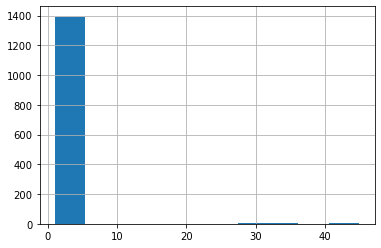

In [152]:
# loadings per week. We see outliers at 30-45
phase1_TA_loadings["loadings"].hist()

<AxesSubplot:>

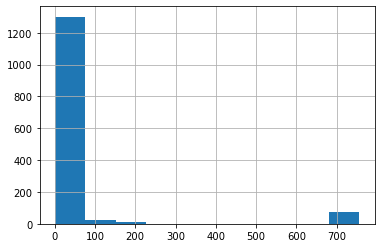

In [153]:
# distribution of Amount per week. We see outliers at 700
phase1_TA_loadings["Amount"].hist()

In [154]:
# We impute a a '0' in amount for people who never purchased after phase 1.
phase1_TA_loadings['loadings'] = phase1_TA_loadings['loadings'].replace(np.nan, 0)
phase1_TA_loadings['Amount'] = phase1_TA_loadings['Amount'].replace(np.nan, 0)
phase1_TA_loadings['week'] = phase1_TA_loadings['week'].replace(np.nan, "Never")
phase1_TA_loadings

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,week,Txn Desc,loadings,Amount
0,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.00
1,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,0,1,0,Never,NaN,0.0,0.00
2,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2020-10-11,Pass,45.0,213.75
3,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2020-10-18,Pass,30.0,138.75
4,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,0,1,0,2021-02-07,Pass,2.0,756.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564,2,0,1,...,0,0,0,0,0,1,2021-04-18,Purse,1.0,20.00
2563,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568,2,0,0,...,0,0,0,0,1,0,2020-07-19,Purse,1.0,10.00
2564,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572,1,0,0,...,0,0,0,0,1,0,2020-03-22,Purse,1.0,50.00
2565,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584,4,0,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.00


In [155]:
phase1_TA_loadings[(phase1_TA_loadings.Amount == 0)] # 1160 users made 0 purchases.

,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,week,Txn Desc,loadings,Amount
0,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.0
1,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,0,1,0,Never,NaN,0.0,0.0
33,38,2/28/2022,2019-05-06,5.303301e+11,10,0,10908,2,0,0,...,0,0,0,0,1,0,Never,NaN,0.0,0.0
34,35,5/31/2021,2019-05-09,5.303301e+11,Passport,1,11950,1,0,0,...,0,0,0,0,1,0,Never,NaN,0.0,0.0
35,41,10/31/2021,2019-06-14,5.303301e+11,10,0,11982,2,0,0,...,0,0,0,0,1,0,Never,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,37,2/28/2022,2019-07-01,5.303301e+11,10,0,201496,2,0,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.0
2555,35,2/28/2022,2019-07-01,5.303301e+11,10,0,201518,1,0,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.0
2556,30,2/28/2022,2019-07-01,5.303301e+11,10,0,201534,1,0,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.0
2557,47,2/28/2022,2019-07-01,5.303301e+11,10,0,201550,3,0,0,...,0,0,0,0,0,1,Never,NaN,0.0,0.0


In [156]:
# 1397 unique user_ids in the df.
len(phase1_TA_loadings["user_id"].unique())

1397

In [157]:
# aggregate by user-id (1397 unique user_ids, summing amount)
total_amount = phase1_TA_loadings.groupby('user_id').agg({'Amount': ['sum']}) # 1397 rows
total_amount # the total amount column is the amount for each user_id (summed over all cards and purchases.)

,Amount
,sum
user_id,
100170,0.0
10168,2558.0
102816,0.0
103558,0.0
103688,0.0
...,...
96912,220.0
96928,0.0


In [158]:
phase1_TA_agg = phase1_TA_loadings.merge(total_amount, on='user_id', how='left')
phase1_TA_agg # 2567 rows

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Age,Expiration,DateIssued,FIPS,Initial_Load,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,...,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,week,Txn Desc,loadings,Amount,"(Amount, sum)"
0,50,2/28/2022,2019-04-01,5.303301e+11,10,0,3228,3,1,0,...,0,0,0,0,1,Never,NaN,0.0,0.00,0.0
1,66,5/31/2021,2019-05-29,5.303301e+11,Passport,1,3970,5,0,0,...,0,0,0,1,0,Never,NaN,0.0,0.00,0.0
2,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2020-10-11,Pass,45.0,213.75,2626.5
3,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2020-10-18,Pass,30.0,138.75,2626.5
4,50,2/28/2022,2019-04-26,5.303301e+11,10,0,6476,3,0,0,...,0,0,0,1,0,2021-02-07,Pass,2.0,756.00,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,44,2/28/2022,2019-07-01,5.303303e+11,10,0,201564,2,0,1,...,0,0,0,0,1,2021-04-18,Purse,1.0,20.00,65.0
2563,45,6/30/2022,2019-07-01,5.303301e+11,10,0,201568,2,0,0,...,0,0,0,1,0,2020-07-19,Purse,1.0,10.00,10.0
2564,34,6/30/2022,2019-07-01,5.303301e+11,10,0,201572,1,0,0,...,0,0,0,1,0,2020-03-22,Purse,1.0,50.00,50.0
2565,64,2/28/2022,2019-07-01,5.303303e+11,10,0,201584,4,0,0,...,0,0,0,0,1,Never,NaN,0.0,0.00,0.0


In [159]:
phase1_TA_agg['Amount','sum']
phase1_TA_agg = phase1_TA_agg.rename(columns = {('Amount','sum'): 'amt_total'})

In [161]:
# categ is a df containing only the categorical variables and response variable amt_total in phase1_TA_agg.
categ = phase1_TA_agg.loc[:, ~phase1_TA_agg.columns.isin(['Age', 'FIPS', 'Expiration', 'DateIssued', 'week','Txn Desc', 'loadings', 'Initial_Load', "Amount"])]
categ # 2567 rows

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
3,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
4,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [162]:
# For matching, each unit will be one of the 1397 unique user_ids. The response will be the total amount they spent after 1/1/2020.
ds_general = categ.drop_duplicates() # drop columns that are for the same user id. We have aggregated their spendings in amt_total already.
ds_general # 1397 rows

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [163]:
ds_general[(ds_general.amt_total != 0)] #  LIFT_reg[(LIFT_reg.Study_Card != "Subsidized Annual Pass") 

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
31,0,10878,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,896.0
36,1,12408,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,201560,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.0
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0


In [164]:
# why is it that most users who registered during phase 1 (3-7/2019) did not purchase at all after (1/2020)? Is this true?
ds_general['amt_total'].value_counts().head(20)

0.0       1159
20.0        21
10.0        15
40.0        14
756.0       10
50.0         7
25.0         5
30.0         5
54.0         5
46.0         4
776.0        4
1532.0       4
220.0        3
192.0        3
162.0        3
1108.5       3
110.0        2
150.0        2
105.0        2
15.0         2
Name: amt_total, dtype: int64

<AxesSubplot:>

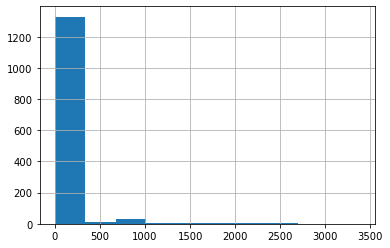

In [165]:
# distribution of total_amt by user after 1/1/20.
ds_general["amt_total"].hist()

In [166]:
# 82% of users in phase 1 did not purchase sales 01/01/2020
print(1159/1397)
print(237/1397)

0.8296349319971367
0.16964924838940587


### Demographics of those who did make sales purchases (long term use of ORCA LIFT).

In [168]:
ds_general

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,201584,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [169]:
made_purchases =  ds_general[(ds_general.amt_total != 0)]
made_no_purchase = ds_general[(ds_general.amt_total == 0)]
made_purchases

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
2,0,6476,3,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,6950,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,10168,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
31,0,10878,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,896.0
36,1,12408,3,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2558,0,201560,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,25.0
2560,0,201564,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,201568,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,201572,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0


<AxesSubplot:>

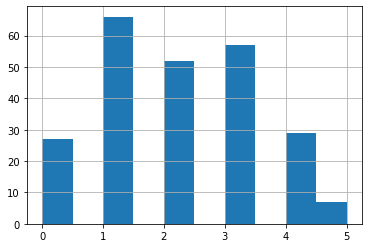

In [170]:
made_purchases["Age_bin"].hist()

<AxesSubplot:>

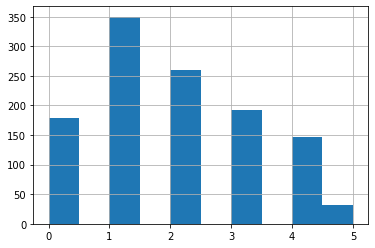

In [171]:
made_no_purchase["Age_bin"].hist()

In [174]:
# reverse 1-hot encoding of race (https://stackoverflow.com/questions/38334296/reversing-one-hot-encoding-in-pandas)

s = made_purchases.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_purchases["Race_desc"] = pd.get_dummies(s, prefix='RaceDesc').idxmax(1) # is counting everyone who does not fit into a category as Native American.

t = made_purchases.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_purchases["Agency"] = pd.get_dummies(t, prefix='Agency').idxmax(1)
made_purchases

u = made_no_purchase.loc[:,'RaceDesc_American Indian or Alaska Native':'RaceDesc_White']
made_no_purchase["Race_desc"] = pd.get_dummies(u, prefix='RaceDesc').idxmax(1)

v = made_no_purchase.loc[:,'CardIssuingAgency_CSO Auburn':'CardIssuingAgency_CSO White Center']
made_no_purchase["Agency"] = pd.get_dummies(v, prefix='Agency').idxmax(1)
made_no_purchase

,Study_Card,user_id,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,...,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total,Race_desc,Agency
0,0,3228,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_American Indian or Alaska Native,CardIssuingAgency_CSO White Center
1,1,3970,5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_White,CardIssuingAgency_CSO Capitol Hill
33,0,10908,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Not Specified,CardIssuingAgency_CSO Capitol Hill
34,1,11950,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Black or African American,CardIssuingAgency_CSO Capitol Hill
35,0,11982,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.0,RaceDesc_Not Specified,CardIssuingAgency_CSO Capitol Hill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,0,201496,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2555,0,201518,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2556,0,201534,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center
2557,0,201550,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0.0,RaceDesc_White,CardIssuingAgency_CSO White Center


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

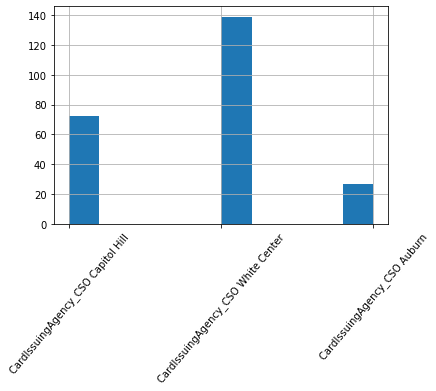

In [175]:
# eda shows no drastic correlations beteween long term enrollment and agency. 
made_purchases["Agency"].hist()
plt.xticks(rotation=50)

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

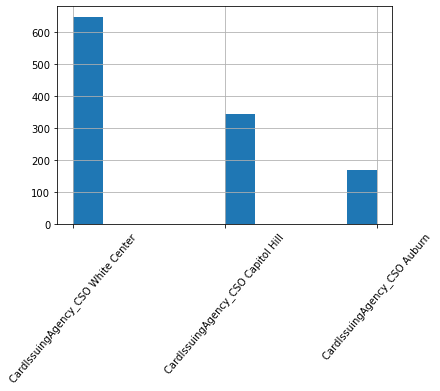

In [176]:
made_no_purchase["Agency"].hist()
plt.xticks(rotation=50)

In [177]:
# seems to be no drastic differences between long term enrollment based on race.
made_purchases["Race_desc"].value_counts()

RaceDesc_White                                        107
RaceDesc_Black or African American                     79
RaceDesc_Hispanic or Latino                            15
RaceDesc_Asian                                         15
RaceDesc_Not Specified                                  7
RaceDesc_None                                           5
RaceDesc_Native Hawaiian or Other Pacific Islander      4
RaceDesc_Other                                          3
RaceDesc_Multi-Racial                                   2
RaceDesc_American Indian or Alaska Native               1
Name: Race_desc, dtype: int64

In [183]:
# white population (purchased/no_purchase)
print(107/452)
# hispanic population (purchased/no_purchase)
print(15/85)

0.23672566371681417
0.17647058823529413


In [178]:
made_no_purchase["Race_desc"].value_counts()

RaceDesc_White                                        452
RaceDesc_Black or African American                    381
RaceDesc_Hispanic or Latino                            85
RaceDesc_Asian                                         50
RaceDesc_Other                                         47
RaceDesc_Not Specified                                 46
RaceDesc_Native Hawaiian or Other Pacific Islander     30
RaceDesc_Multi-Racial                                  29
RaceDesc_None                                          27
RaceDesc_American Indian or Alaska Native              12
Name: Race_desc, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

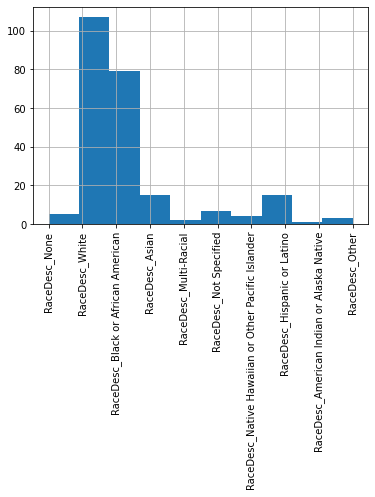

In [182]:
made_purchases["Race_desc"].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

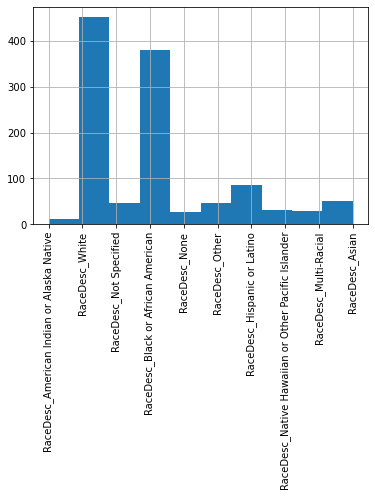

In [181]:
made_no_purchase["Race_desc"].hist()
plt.xticks(rotation=90)

In [61]:
# drop user_id for input to FLAME
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native_x,RaceDesc_Asian_x,RaceDesc_Black or African American_x,RaceDesc_Hispanic or Latino_x,RaceDesc_Multi-Racial_x,RaceDesc_Native Hawaiian or Other Pacific Islander_x,RaceDesc_Not Specified_x,RaceDesc_Other_x,...,LanguageSpoken_Russian_y,LanguageSpoken_Somali_y,LanguageSpoken_Spanish_y,LanguageSpoken_Tagalog_y,LanguageSpoken_Tigrinya_y,LanguageSpoken_Vietnamese_y,CardIssuingAgency_CSO Auburn_y,CardIssuingAgency_CSO Capitol Hill_y,CardIssuingAgency_CSO White Center_y,amt_total
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [188]:
# drop user_id for matching.
ds_general = ds_general.loc[:, ~ds_general.columns.isin(['user_id'])]
ds_general

,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,...,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,3,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,2626.5
8,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,597.0
22,0,4,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,65.0
2563,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,10.0
2564,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,50.0
2565,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0


In [189]:
# flame is faster but dame considers more covariate sets.
model_flame_AMT = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, adaptive_weights='ridge', alpha=0.1, want_pe=True)

# repeats = True allows units to be placed in >1 matched group
# verbose = 3 Prints matching information for each iteration
# adaptive_weights='ridge' The ML algorithm used to decide which covariate should be dropped next.
# want_pe = TRUE If true, the output of the algorithm will include the predictive error (predicting the response) of the covariate sets used for matching in each iteration.

In [190]:
model_flame_AMT.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_flame_AMT = model_flame_AMT.predict(ds_general) # perform the match on the input data

# holdout_data=False The holdout data is equal to the entire input data.

Iteration number:  1
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units:  272 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  1118
	Number of matches made so far:  1118
	In this iteration, the covariates dropped are:  set()
Iteration number:  2
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units:  272 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  134454.88321927
	Number of matches made in this iteration:  0
	Number of matches made so far:  1118
	In this iteration, the covariates dropped are:  LanguageSpoken_Not Specified
Iteration number:  3
	Number of matched groups formed in total:  58
	Unmatched treated units:  7 out of a total of  186 treated units
	Unmatched control units: 

Iteration number:  21
	Number of matched groups formed in total:  116
	Unmatched treated units:  1 out of a total of  186 treated units
	Unmatched control units:  85 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  135029.40365085407
	Number of matches made in this iteration:  193
	Number of matches made so far:  1311
	In this iteration, the covariates dropped are:  LanguageSpoken_Spanish
Iteration number:  22
	Number of matched groups formed in total:  128
	Unmatched treated units:  1 out of a total of  186 treated units
	Unmatched control units:  33 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  135294.28226665873
	Number of matches made in this iteration:  245
	Number of matches made so far:  1363
	In this iteration, the covariates dropped are:  RaceDesc_Not Specified
Iteration number:  23
	Number of matched groups formed in total:  131
	Unmatched treated units:  0 out of a total of  186 trea

Least to Most important variables
1. Language spoken
2. Race
3. Card Issuing Agency
4. Age

In [191]:
# ATE Overall.
ate_AMT = dame_flame.utils.post_processing.ATE(model_flame_AMT)
ate_AMT

-17.257329294773545

In [192]:
# For each unit, we can see the covariates it was matched on.
model_flame_AMT.df_units_and_covars_matched[:25]

,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,...,LanguageSpoken_Other,LanguageSpoken_Russian,LanguageSpoken_Somali,LanguageSpoken_Spanish,LanguageSpoken_Tagalog,LanguageSpoken_Tigrinya,LanguageSpoken_Vietnamese,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
0,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
2,3,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
8,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
22,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
31,3,*,*,0,*,*,*,*,*,*,...,*,*,0,*,*,*,*,0,*,0
33,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
36,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Matching on Race.

In [207]:
phase1_TA_agg.columns

Index(['Age', 'Expiration', 'DateIssued', 'FIPS', 'Initial_Load', 'Study_Card',
       'user_id', 'Age_bin', 'RaceDesc_American Indian or Alaska Native',
       'RaceDesc_Asian', 'RaceDesc_Black or African American',
       'RaceDesc_Hispanic or Latino', 'RaceDesc_Multi-Racial',
       'RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None',
       'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White',
       'LanguageSpoken_Chinese', 'LanguageSpoken_Dari',
       'LanguageSpoken_English', 'LanguageSpoken_Korean',
       'LanguageSpoken_Not Specified', 'LanguageSpoken_Oromo',
       'LanguageSpoken_Other', 'LanguageSpoken_Russian',
       'LanguageSpoken_Somali', 'LanguageSpoken_Spanish',
       'LanguageSpoken_Tagalog', 'LanguageSpoken_Tigrinya',
       'LanguageSpoken_Vietnamese', 'CardIssuingAgency_CSO Auburn',
       'CardIssuingAgency_CSO Capitol Hill',
       'CardIssuingAgency_CSO White Center', 'week', 'Txn Desc', 'loadings',
       'Amount', 'amt_total'],


In [208]:
race = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['user_id','Study_Card','amt_total','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race

,Study_Card,user_id,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,3228,1,0,0,0,0,0,0,0,0,0,0.0
1,1,3970,0,0,0,0,0,0,0,0,0,1,0.0
2,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,201564,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,201568,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,201572,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,201584,0,0,0,0,0,0,0,0,0,1,0.0


In [209]:
race[2:8] # rows 2:8 correspond to purchases made by the same user.

,Study_Card,user_id,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
2,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
5,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
6,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5
7,0,6476,0,0,0,0,0,0,1,0,0,0,2626.5


In [210]:
race = race.drop_duplicates() # 1397 rows. drop columns that are for the same user id. We have aggregated in amt_total already.

In [211]:
# drop user_id for matching.
race = race.loc[:, ~race.columns.isin(['user_id'])]
race

,Study_Card,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,1,0,0,0,0,0,0,0,0,0,0.0
1,1,0,0,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,1,0,0,0,2626.5
8,0,0,0,0,0,0,0,0,0,0,1,597.0
22,0,0,0,1,0,0,0,0,0,0,0,2558.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2560,0,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,0,0,0,0,0,0,0,0,0,1,0.0


In [212]:
model_flame_race = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30,adaptive_weights='ridge', alpha=0.1, want_pe=True)

model_flame_race.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race = model_flame_race.predict(race)

Iteration number:  1
	Number of matched groups formed in total:  10
	Unmatched treated units:  0 out of a total of  186 treated units
	Unmatched control units:  0 out of a total of  1211 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  1397
	Number of matches made so far:  1397
	In this iteration, the covariates dropped are:  set()
All units have been matched.


In [213]:
# For each unit, we can see the covariates it was matched on.
model_flame_race.df_units_and_covars_matched[:10]

,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,1
22,0,0,1,0,0,0,0,0,0,0
31,0,1,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,1,0,0
34,0,0,1,0,0,0,0,0,0,0
35,0,0,0,0,0,0,0,1,0,0
36,0,0,1,0,0,0,0,0,0,0


In [215]:
groups = list(range(len(model_flame_race.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race, group[0]))
    len_group.append(len(group))

In [216]:
# model_flame_race.units_per_group
# insight into match groups below

[g[0] for g in model_flame_race.units_per_group]

[0, 31, 22, 45, 93, 154, 2, 33, 43, 1]

In [221]:
mmg2 = dame_flame.utils.post_processing.MG(model_flame_race, unit_ids =0) # main matched group for unit k.
mmg2

,Study_Card,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,1,0,0,0,0,0,0,0,0,0,0.0
279,0,1,0,0,0,0,0,0,0,0,0,0.0
352,0,1,0,0,0,0,0,0,0,0,0,0.0
534,0,1,0,0,0,0,0,0,0,0,0,0.0
814,1,1,0,0,0,0,0,0,0,0,0,0.0
931,1,1,0,0,0,0,0,0,0,0,0,776.0
933,1,1,0,0,0,0,0,0,0,0,0,0.0
1221,0,1,0,0,0,0,0,0,0,0,0,0.0
1224,0,1,0,0,0,0,0,0,0,0,0,0.0
1314,0,1,0,0,0,0,0,0,0,0,0,0.0


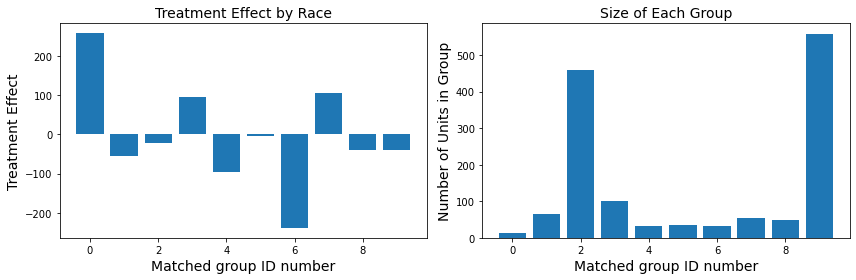

In [222]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

1. RaceDesc_American Indian or Alaska Native -
2. RaceDesc_Asian	
3. RaceDesc_Black or African American	
4. RaceDesc_Hispanic or Latino	-
5. RaceDesc_Multi-Racial	
6. RaceDesc_Native Hawaiian or Other Pacific Islander	
7. RaceDesc_None
8. RaceDesc_Not Specified -
9. RaceDesc_Other	
10. RaceDesc_White


In [225]:
# Counts of races in treatment group

tt_race = race[(race.Study_Card != 0)]
print(tt_race["RaceDesc_Asian"].value_counts()) # 7 asian individuals who received treatment (after aggregating units to the individual, rather than a sales transaction.)
print(tt_race["RaceDesc_Hispanic or Latino"].value_counts()) # 11 
print(tt_race["RaceDesc_American Indian or Alaska Native"].value_counts()) # 4
tt_race["RaceDesc_Black or African American"].value_counts() # 126
print(tt_race["RaceDesc_White"].value_counts()) # 81
print(tt_race["RaceDesc_Not Specified"].value_counts()) # 4

0    179
1      7
Name: RaceDesc_Asian, dtype: int64
0    175
1     11
Name: RaceDesc_Hispanic or Latino, dtype: int64
0    183
1      3
Name: RaceDesc_American Indian or Alaska Native, dtype: int64
0    105
1     81
Name: RaceDesc_White, dtype: int64
0    183
1      3
Name: RaceDesc_Not Specified, dtype: int64


In [226]:
# differential CA treatment effects
cate_NativeAm = dame_flame.utils.post_processing.CATE(model_flame_race, 0)
print(cate_NativeAm) # nrow - 11 (4 in treatment)

cate_Asian = dame_flame.utils.post_processing.CATE(model_flame_race, 31)
print(cate_Asian) # nrow 143 (8 in treatment)

cate_AA = dame_flame.utils.post_processing.CATE(model_flame_race, 22)
print(cate_AA) # 1004 (126 in treatment)

cate_Hisp = dame_flame.utils.post_processing.CATE(model_flame_race, 45)
print(cate_Hisp) # nrow = 226 (45 in treatment)

cate_Hw = dame_flame.utils.post_processing.CATE(model_flame_race, 154)
print(cate_Hw) # nrow = 226 (45 in treatment)

cate_White = dame_flame.utils.post_processing.CATE(model_flame_race, 1)
print(cate_White) # nrow 1222 (126 in treatment)

258.6666666666667
-54.20566502463054
-22.849814024261384
95.74412665985699
-4.362500000000001
-40.04565705873237


## Matching on Agency

In [242]:
agency = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','CardIssuingAgency_CSO Auburn', 'CardIssuingAgency_CSO Capitol Hill', 'CardIssuingAgency_CSO White Center'])]
agency

,Study_Card,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,0,0,1,0.0
1,1,0,1,0,0.0
2,0,0,1,0,2626.5
3,0,0,1,0,2626.5
4,0,0,1,0,2626.5
...,...,...,...,...,...
2562,0,0,0,1,65.0
2563,0,0,1,0,10.0
2564,0,0,1,0,50.0
2565,0,0,0,1,0.0


In [228]:
# Matching on agency.
model_flame_agency = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agency.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agency = model_flame_agency.predict(agency)

Iteration number:  1
	Number of matched groups formed in total:  3
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  0 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2567
	Number of matches made so far:  2567
	In this iteration, the covariates dropped are:  set()
2567 units matched. We finished with no more treated units to match


In [229]:
mmg3 = dame_flame.utils.post_processing.MG(model_flame_agency, unit_ids =0) # main matched group for unit k.
mmg3

,Study_Card,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center,amt_total
0,0,0,0,1,0.0
8,0,0,0,1,597.0
9,0,0,0,1,597.0
10,0,0,0,1,597.0
11,0,0,0,1,597.0
...,...,...,...,...,...
2560,0,0,0,1,65.0
2561,0,0,0,1,65.0
2562,0,0,0,1,65.0
2565,0,0,0,1,0.0


In [230]:
# For each unit, we can see the covariates it was matched on.
model_flame_agency.df_units_and_covars_matched[:100]

,CardIssuingAgency_CSO Auburn,CardIssuingAgency_CSO Capitol Hill,CardIssuingAgency_CSO White Center
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
95,0,1,0
96,0,0,1
97,0,1,0
98,0,1,0


In [234]:
# differential CA treatment effects
cate_CH = dame_flame.utils.post_processing.CATE(model_flame_agency, 1)
print(cate_CH) # North

cate_WC = dame_flame.utils.post_processing.CATE(model_flame_agency, 0)
print(cate_WC)

cate_Auburn = dame_flame.utils.post_processing.CATE(model_flame_agency, 9)
print(cate_Auburn) # Auburn is the southmost among the three: https://en.wikipedia.org/wiki/Auburn,_Washington)

-181.9587793159222
-109.70522117631921
-109.70522117631921


In [235]:
# Number of auburn in treatment group
# larger group size correlate to smaller treatment effect.
tt_a = agency[(agency.Study_Card != 0)]
tt_a["CardIssuingAgency_CSO Auburn"].value_counts() # 97 (March 29th: 67)

0    215
1     68
Name: CardIssuingAgency_CSO Auburn, dtype: int64

In [236]:
groups = list(range(len(model_flame_agency.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agency.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agency, group[0]))
    len_group.append(len(group))

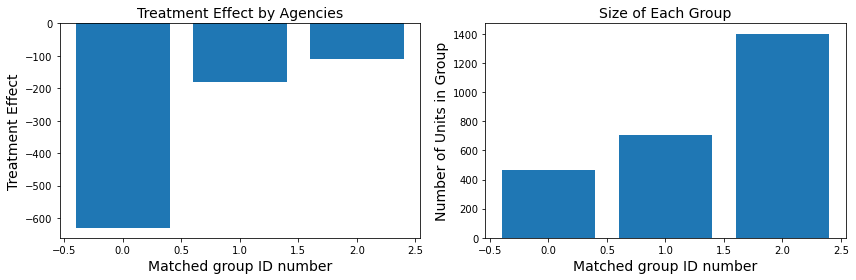

In [237]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Agencies', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

## Matching on Age Category

In [243]:
age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin'])]
age

,Study_Card,Age_bin,amt_total
0,0,3,0.0
1,1,5,0.0
2,0,3,2626.5
3,0,3,2626.5
4,0,3,2626.5
...,...,...,...
2562,0,2,65.0
2563,0,2,10.0
2564,0,1,50.0
2565,0,4,0.0


In [244]:
model_flame_agebin = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_agebin.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_agebin = model_flame_agebin.predict(age)

Iteration number:  1
	Number of matched groups formed in total:  6
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  0 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2567
	Number of matches made so far:  2567
	In this iteration, the covariates dropped are:  set()
2567 units matched. We finished with no more treated units to match


In [180]:
# For each unit, we can see the covariates it was matched on.
# model_flame_agebin.df_units_and_covars_matched[50:60]

In [245]:
groups = list(range(len(model_flame_agebin.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_agebin.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_agebin, group[0]))
    len_group.append(len(group))

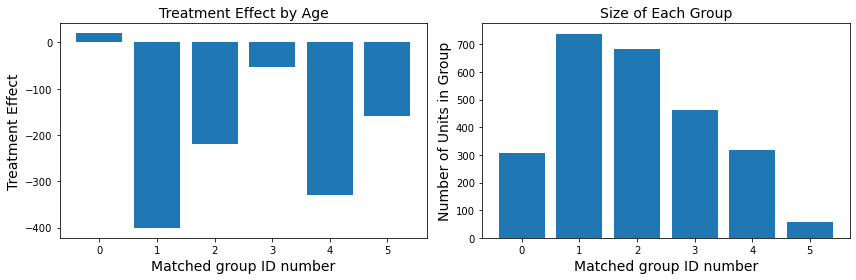

In [246]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [267]:
cate_0 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 125)
print(cate_0) # 18-25
cate_1 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 70)
print(cate_1) # 25-35
cate_2 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 79)
print(cate_2)
cate_3 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(cate_3)
cate_4 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 8)
print(cate_4)
cate_5 = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(cate_5) # >65

20.171861595653425
-400.89417598049175
-218.90090993046496
-51.93333333333334
-329.9946383568548
-157.76415094339623


In [268]:
# For each unit, we can see the covariates it was matched on.
model_flame_agebin.df_units_and_covars_matched[100:110]

,Age_bin
100,2
101,4
102,1
103,2
104,2
105,2
106,2
107,2
108,2
109,2


## Matching on Race + AgeBin

In [271]:
race_age = phase1_TA_agg.loc[:, phase1_TA_agg.columns.isin(['Study_Card','amt_total','Age_bin','RaceDesc_American Indian or Alaska Native', 'RaceDesc_Asian', 'RaceDesc_Black or African American','RaceDesc_Hispanic or Latino','RaceDesc_Multi-Racial','RaceDesc_Native Hawaiian or Other Pacific Islander', 'RaceDesc_None', 'RaceDesc_Not Specified', 'RaceDesc_Other', 'RaceDesc_White'])]
race_age


,Study_Card,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White,amt_total
0,0,3,1,0,0,0,0,0,0,0,0,0,0.0
1,1,5,0,0,0,0,0,0,0,0,0,1,0.0
2,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
3,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
4,0,3,0,0,0,0,0,0,1,0,0,0,2626.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0,2,0,1,0,0,0,0,0,0,0,0,65.0
2563,0,2,0,0,0,0,0,0,0,0,0,1,10.0
2564,0,1,0,0,0,0,0,0,0,0,0,1,50.0
2565,0,4,0,0,0,0,0,0,0,0,0,1,0.0


In [272]:
model_flame_race_age = dame_flame.matching.FLAME(repeats=True, verbose=3, early_stop_iterations=30, stop_unmatched_t=True, adaptive_weights='ridge', alpha=0.1, want_pe=True)
model_flame_race_age.fit(holdout_data=False, treatment_column_name='Study_Card', outcome_column_name='amt_total')
result_race_age = model_flame_race_age.predict(race_age)


Iteration number:  1
	Number of matched groups formed in total:  38
	Unmatched treated units:  0 out of a total of  283 treated units
	Unmatched control units:  131 out of a total of  2284 control units
	Predictive error of covariates chosen this iteration:  0
	Number of matches made in this iteration:  2436
	Number of matches made so far:  2436
	In this iteration, the covariates dropped are:  set()
2436 units matched. We finished with no more treated units to match


In [317]:
# For each unit, we can see the covariates it was matched on.
model_flame_race_age.df_units_and_covars_matched[:46]

,Age_bin,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic or Latino,RaceDesc_Multi-Racial,RaceDesc_Native Hawaiian or Other Pacific Islander,RaceDesc_None,RaceDesc_Not Specified,RaceDesc_Other,RaceDesc_White
0,3,1,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,1
8,4,0,0,0,0,0,0,0,0,0,1
9,4,0,0,0,0,0,0,0,0,0,1
10,4,0,0,0,0,0,0,0,0,0,1
11,4,0,0,0,0,0,0,0,0,0,1
12,4,0,0,0,0,0,0,0,0,0,1
13,4,0,0,0,0,0,0,0,0,0,1
14,4,0,0,0,0,0,0,0,0,0,1
15,4,0,0,0,0,0,0,0,0,0,1


In [277]:
groups = list(range(len(model_flame_race_age.units_per_group)))
cate_of_group = []
len_group = []
for group in model_flame_race_age.units_per_group:
    cate_of_group.append(dame_flame.utils.post_processing.CATE(model_flame_race_age, group[0]))
    len_group.append(len(group))

In [299]:
# model_flame_race.units_per_group
# insight into match groups below

print([g[0] for g in model_flame_race_age.units_per_group])

[228, 426, 329, 154, 384, 128, 534, 303, 34, 45, 93, 347, 43, 89, 419, 53, 289, 984, 942, 71, 33, 341, 44, 0, 31, 36, 521, 201, 200, 38, 763, 22, 278, 336, 8, 258, 710, 1]


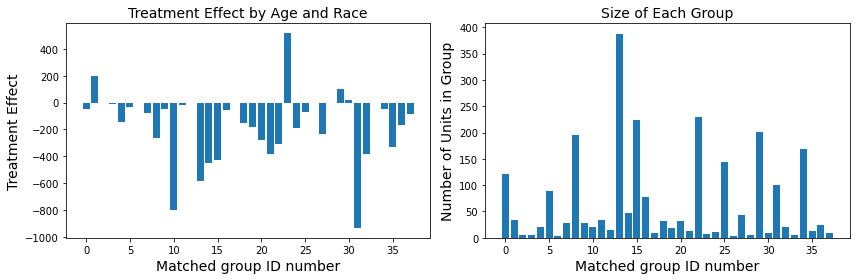

In [279]:
f, ax = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1, 1]}, figsize=(12,4))
ax[0].set_ylabel('Treatment Effect', fontsize=14)
ax[0].set_xlabel('Matched group ID number', fontsize=14)
ax[0].set_title('Treatment Effect by Age and Race', fontsize=14)
ax[0].bar(groups,cate_of_group)

ax[1].set_ylabel('Number of Units in Group', fontsize=14) # each unit is a sale purchase
ax[1].set_xlabel('Matched group ID number', fontsize=14)
ax[1].set_title('Size of Each Group', fontsize=14)
ax[1].bar(groups,len_group)

plt.tight_layout()

In [305]:
group_indices = [g[0] for g in model_flame_race_age.units_per_group]
print(group_indices)
print(cate_of_group)

[228, 426, 329, 154, 384, 128, 534, 303, 34, 45, 93, 347, 43, 89, 419, 53, 289, 984, 942, 71, 33, 341, 44, 0, 31, 36, 521, 201, 200, 38, 763, 22, 278, 336, 8, 258, 710, 1]
[-49.20175438596491, 195.74615384615385, 0.0, -8.0, -140.8421052631579, -34.636073059360726, 0.0, -76.81481481481481, -264.3904761904762, -48.42857142857143, -798.5263157894736, -21.066666666666677, -4.153846153846154, -587.0042782394584, -452.8723404255319, -429.58878504672896, -54.303571428571445, 0.0, -154.58333333333334, -182.05882352941177, -279.1, -379.5, -304.5889652014652, 517.3333333333334, -188.2, -68.65560775102759, 0.0, -233.83333333333337, 0.0, 100.82928388746808, 20.0, -934.3319327731092, -380.0, 0.0, -46.120128205128196, -333.375, -164.5909090909091, -82.22222222222223]


In [315]:
print(cate_of_group[23])
print(group_indices[23])

517.3333333333334
0


In [307]:
print(model_flame_race_age.df_units_and_covars_matched.iloc[426])
print(model_flame_race_age.df_units_and_covars_matched.iloc[0])

Age_bin                                               0
RaceDesc_American Indian or Alaska Native             0
RaceDesc_Asian                                        0
RaceDesc_Black or African American                    0
RaceDesc_Hispanic or Latino                           0
RaceDesc_Multi-Racial                                 0
RaceDesc_Native Hawaiian or Other Pacific Islander    0
RaceDesc_None                                         0
RaceDesc_Not Specified                                0
RaceDesc_Other                                        0
RaceDesc_White                                        1
Name: 489, dtype: object
Age_bin                                               3
RaceDesc_American Indian or Alaska Native             1
RaceDesc_Asian                                        0
RaceDesc_Black or African American                    0
RaceDesc_Hispanic or Latino                           0
RaceDesc_Multi-Racial                                 0
RaceDesc_Native Hawaiia

In [316]:
# age bin 5 + White
white_old = dame_flame.utils.post_processing.CATE(model_flame_agebin, 1)
print(white_old)
white_0  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 426)
print(white_0)
# age bin 0 + Hispanic/Latino
hispanic_1  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 45)
print(hispanic_1)
# age bin 3 + Native American
Native_3  = dame_flame.utils.post_processing.CATE(model_flame_agebin, 0)
print(Native_3)

-157.76415094339623
20.171861595653425
-400.89417598049175
-51.93333333333334


Comments: In this analysis, earch unit is a sales purchase. What I could do, is aggregate by card_id s.t. each unit is an individual. (aggregating by person: histogram of number of purchases per individual.)

In [ ]:
# look at the young, white population.
# age distribution: hispanic population.
# look into location + age. (agency + age)

# make graph: income by age category.
# is average sales different between different stages.